# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [1]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.linear_model import LogisticRegression

#importing scikit learning modules
from sklearn.model_selection import train_test_split


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:

# file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
file_path = os.getcwd() + '\images2'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
classes = []
for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    if (path.split("/")[-1]!='images2'):
        classes.append([label_names[i].split(" ")[0]])
        for img in os.listdir(path):
            pic = cv2.imread(os.path.join(path,img))
            pic = cv2.resize(pic,(80,80))
            pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
            data.append(pic)
            
            labels.append([i])
        i+=1
        

In [3]:
print(len(classes))
classes

18


[['1820'],
 ['1830'],
 ['1840'],
 ['1850'],
 ['1860'],
 ['1870'],
 ['1880'],
 ['1890'],
 ['1900'],
 ['1910'],
 ['1920'],
 ['1930'],
 ['1940'],
 ['1950'],
 ['1955'],
 ['1960'],
 ['1965'],
 ['1970']]

In [4]:
print(len(labels))
labels[0:25]

595


[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]]

In [5]:
data = np.asarray(data)
labels = np.asarray(labels)
#print(data[344])
#print(labels[344])
#data[0].flatten()

In [6]:
print(data[344].shape)
#plt.imshow(saved[0].reshape(80,80,3))
#data[344]

(80, 80, 3)


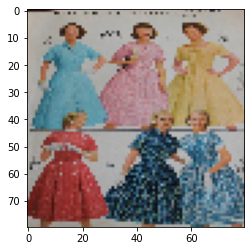

In [7]:
plt.imshow(data[344].reshape(80, 80, 3))

In [8]:
# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 0)

In [9]:
train_images.shape

(446, 80, 80, 3)

In [10]:
test_images.shape

(149, 80, 80, 3)

In [11]:
train_labels.shape

(446, 1)

In [12]:
test_labels.shape

(149, 1)

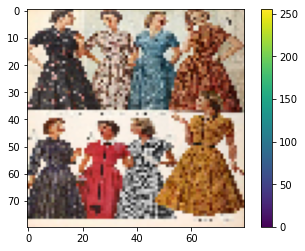

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


TypeError: only integer scalar arrays can be converted to a scalar index

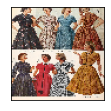

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
train_labels = to_categorical(train_labels, 87)
test_labels = to_categorical(test_labels, 87)
print(train_labels[0])


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80,80,3)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(1000, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(500, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(250, activation='relu'))
# model.add(tf.keras.layers.Dense(87, activation='softmax'))

model2 = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(10)
])

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


model = Sequential([  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  layers.Conv2D(16, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(32, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(64, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Flatten(),  layers.Dense(128, activation='relu'),  layers.Dense(num_classes)])



In [ ]:
model3.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model3.fit(train_images, train_labels, batch_size=10, epochs=5)


In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.yticks(np.arange(0, 1, .1))
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model3.evaluate(test_images, test_labels, batch_size=1)